# 5. Simple Vizualisations

## Import libraries and Create Paths

In [1]:
import pandas as pd
import os
import plotly.graph_objects as go
import kaleido
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
local_dir="/Users/antonioslagarias/data-science-code/"

os.chdir(local_dir)

In [3]:
cwd = os.getcwd()
print("Current working directory:", cwd)

Current working directory: /Users/antonioslagarias/data-science-code


In [4]:
OUT_PATH_VIS="ift6758/visualizations/Step_5_simple_vis/"

In [5]:
print(local_dir+OUT_PATH_VIS)

/Users/antonioslagarias/data-science-code/ift6758/visualizations/Step_5_simple_vis/


## First figure

Instructions : Produce a figure comparing the shot types over all teams (i.e. just aggregate all of the shots), in a season of your choosing. Overlay the number of goals
overtop the number of shots. What appears to be the most dangerous type of
shot? The most common type of shot? Why did you choose this figure? Add this
figure and discussion to your blog post.

Reasoning:
For this exercice, we choose the season with most recorded events, i.e. 2021-2022
The objective is to vizualize in the single figure the relationship between shots, goals and type of shots (wrist, snap, slap, backhand, tip-in, deflected, wrap-around).
For this we first need to know the ratio of goals vs shots per type of shot.

### First Figure_prep

In [6]:
path="ift6758/data/2016-2024_processed/2021-2022_events.csv"
df_2021=pd.read_csv(path)
df_2021.head(5)

,game_id,season,game_type,event_type,period,period_time,x_coord,y_coord,shot_type,team_id,team_name,player_name,goalie_name
0,2021020001,2021,regular,SHOT_ON_GOAL,1,01:03,61,-32,wrist,14,Tampa Bay Lightning,Steven Stamkos,Tristan Jarry
1,2021020001,2021,regular,SHOT_ON_GOAL,1,01:44,-65,19,wrist,5,Pittsburgh Penguins,Brock McGinn,Andrei Vasilevskiy
2,2021020001,2021,regular,SHOT_ON_GOAL,1,02:01,-8,-27,wrist,14,Tampa Bay Lightning,Jan Rutta,Tristan Jarry
3,2021020001,2021,regular,SHOT_ON_GOAL,1,02:47,-60,-4,wrist,5,Pittsburgh Penguins,Danton Heinen,Andrei Vasilevskiy
4,2021020001,2021,regular,SHOT_ON_GOAL,1,03:07,63,4,wrist,14,Tampa Bay Lightning,Ondrej Palat,Tristan Jarry


In [7]:
sums_shots= df_2021["shot_type"].value_counts()
print(sums_shots.sort_values(ascending=False))

shot_type
wrist          51806
snap           11875
slap           11481
backhand        7149
tip-in          4756
deflected       1739
wrap-around      776
Name: count, dtype: int64


In [8]:
ratios = (
    df_2021.groupby("shot_type")["event_type"]
    .apply(lambda x: (x=="GOAL").mean() * 100).round(2)

)
print(ratios.sort_values(ascending=False))

shot_type
tip-in         16.90
deflected      16.33
backhand       12.45
snap           11.60
wrist           9.08
slap            7.23
wrap-around     5.54
Name: event_type, dtype: float64


In [9]:
sums_goals = (
    df_2021.groupby("shot_type")["event_type"]
    .apply(lambda x: (x=="GOAL").sum())

)
print(sums_goals.sort_values(ascending=False))

shot_type
wrist          4704
snap           1378
backhand        890
slap            830
tip-in          804
deflected       284
wrap-around      43
Name: event_type, dtype: int64


In [10]:
df_2021.groupby("shot_type").size().sort_index()

shot_type
backhand        7149
deflected       1739
slap           11481
snap           11875
tip-in          4756
wrap-around      776
wrist          51806
dtype: int64

### First Figure_tests

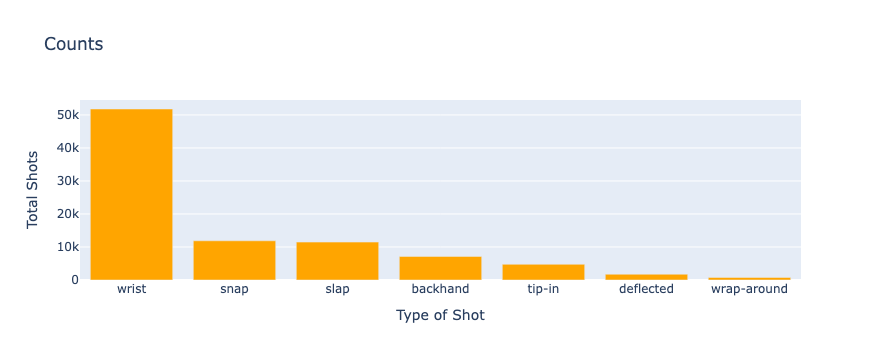

In [11]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=sums_shots.index.astype(str),
    y=sums_shots.values,
    name=f'B = "{"GOAL"}"',
    marker_color="orange"
))

fig.update_layout(
    title=f'Counts',
    xaxis_title="Type of Shot",
    yaxis_title="Total Shots",
)

fig.show()

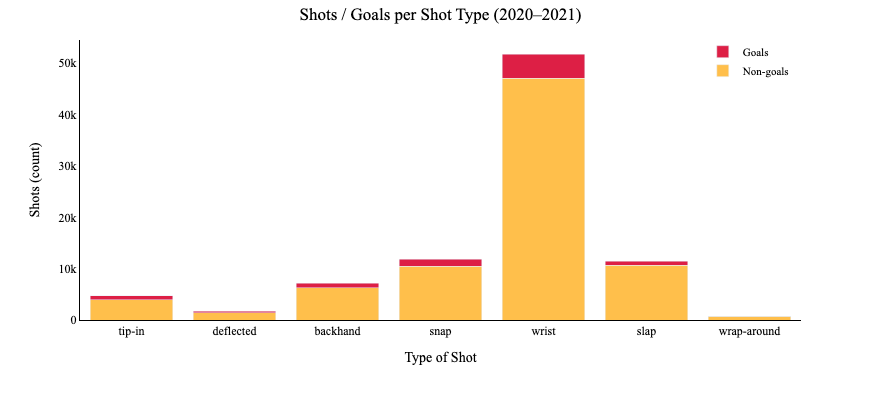

In [20]:
import numpy as np
import plotly.graph_objects as go

# Order by goal rate (you already had this)
order = ratios.sort_values(ascending=False).index
ratios_sorted = ratios.loc[order]
sums_shots_sorted = sums_shots.loc[order]

# If ratios are in percent (e.g., 12.3 for 12.3%), convert to proportion
# Comment this out if your ratios are already in [0,1].
ratios_prop = ratios_sorted / 100.0

# Compute counts
goals_counts = (ratios_prop * sums_shots_sorted).astype(float)
non_goals_counts = (sums_shots_sorted - goals_counts).clip(lower=0).astype(float)

fig = go.Figure()

# Stacked bars: Goals + Non-goals = Total shots

fig.add_trace(go.Bar(
    x=sums_shots_sorted.index.astype(str),
    y=non_goals_counts.values,
    name="Non-goals",
    marker_color="orange",
    opacity=0.7
))
fig.add_trace(go.Bar(
    x=sums_shots_sorted.index.astype(str),
    y=goals_counts.values,
    name="Goals",
    marker_color="crimson",
    opacity=0.95
))


family_titles = "Times New Roman"
fig.update_layout(
    plot_bgcolor="white",
    paper_bgcolor="white",
    title=dict(
        text="Shots / Goals per Shot Type (2020–2021)",
        font=dict(size=17, family=family_titles, color="black"),
        x=0.5,
        pad=dict(t=1)
    ),
    xaxis=dict(
        title=dict(text="Type of Shot", font=dict(size=14, family=family_titles, color="black")),
        tickfont=dict(size=12, family=family_titles, color="black"),
        showgrid=False, zeroline=False, showline=True, linecolor="black", linewidth=1
    ),
    yaxis=dict(
        title=dict(text="Shots (count)", font=dict(size=14, family=family_titles, color="black")),
        tickfont=dict(size=12, family=family_titles, color="black"),
        showgrid=False, zeroline=False, showline=True, linecolor="black", linewidth=1
    ),
    legend=dict(
        x=0.99, y=1.01, xanchor="right", yanchor="top",
        font=dict(size=11, family=family_titles, color="black"),
        bgcolor="rgba(255,255,255,0.5)"
    ),
    barmode="stack",          # <<< stack instead of group
    margin=dict(t=40),
    width=800, height=400
)

#fig.write_image(OUT_PATH_VIS + "Shot_Types_2020_2021.svg")
#fig.write_image(OUT_PATH_VIS + "Shot_Types_2020_2021.png", scale=5)
fig.show()


### First Figure_choice

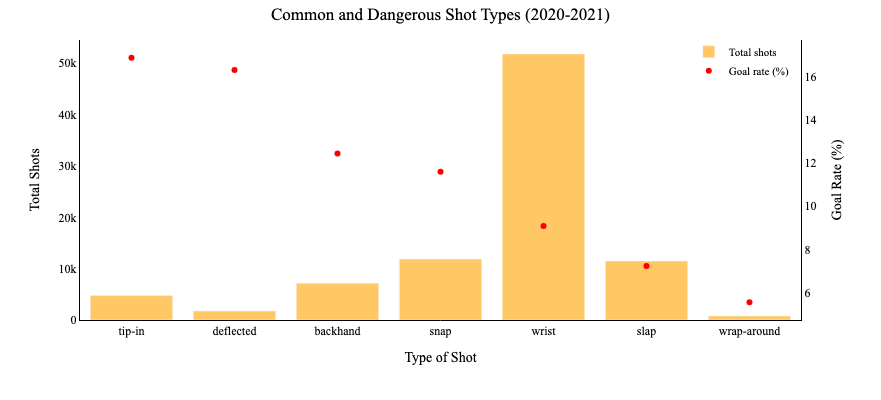

In [21]:
order = ratios.sort_values(ascending=False).index

ratios_sorted = ratios.loc[order]
sums_shots_sorted = sums_shots.loc[order]

fig = go.Figure()

# Bar: total shots
fig.add_trace(go.Bar(
    x=sums_shots_sorted.index.astype(str),
    y=sums_shots_sorted.values,
    name="Total shots",
    marker_color="orange",
    opacity=0.6,
    yaxis="y1"
))

# Line: ratio (%) of goals, second axis
fig.add_trace(go.Scatter(
    x=ratios_sorted.index.astype(str),
    y=ratios_sorted.values,
    name="Goal rate (%)",
    mode="markers",
    marker=dict(color="red"),
    yaxis="y2"
))

# Layout with dual y-axes

family_titles="Times New Roman"
fig.update_layout(
    plot_bgcolor="white",
    paper_bgcolor="white",
    title=dict(
    text="Common and Dangerous Shot Types (2020-2021)",
    font=dict(size=17, family=family_titles, color="black"),  # title font
    x=0.5,
    pad=dict(t=1)

    ),
    xaxis=dict(
        title=dict(
            text="Type of Shot",
            font=dict(size=14, family=family_titles, color="black")
        ),
        tickfont=dict(size=12, family=family_titles, color="black"),
        showgrid=False,
        zeroline=False,      
        showline=True,       
        linecolor="black",   
        linewidth=1        
    ),
    yaxis=dict(
        title=dict(
            text="Total Shots",
            font=dict(size=14, family=family_titles, color="black")
        ),
        tickfont=dict(size=12, family=family_titles, color="black"),
        showgrid=False,
        zeroline=False,      
        showline=True,       
        linecolor="black",   
        linewidth=1        
    ),
    yaxis2=dict(
        title=dict(
            text="Goal Rate (%)",
            font=dict(size=14, family=family_titles, color="black")
        ),
        tickfont=dict(size=12, family=family_titles, color="black"),
        overlaying="y",
        side="right",
        showgrid=False,
        zeroline=False,      
        showline=True,       
        linecolor="black",   
        linewidth=1        
    ),
    legend=dict(
        x=0.99, y=1.01,              
        xanchor="right", yanchor="top",
        font=dict(size=11, family=family_titles, color="black"),
        bgcolor="rgba(255,255,255,0.5)"  # optional background
    ),
    barmode="group",
    margin=dict(t=40)
    )

#fig.add_annotation(
#    text=caption,
#    xref="paper", yref="paper",
#    x=1.1, y=-0.4,
#    showarrow=False,
#    font=dict(size=12, family=family_titles, color="black"),
#    align="left"
#)
fig.update_layout(width=800, height=400)
fig.write_image(OUT_PATH_VIS+"Shot_Types_2020_2021.svg")
fig.write_image(OUT_PATH_VIS+"Shot_Types_2020_2021.png", scale=5)
fig.write_html(OUT_PATH_VIS + "Shot_Types_2020_2021.html", include_plotlyjs="cdn", full_html=False)
fig.show()

In [17]:
caption = ("Figure 5.1 compares the different shot types during the 2021–2022 season. "
           "The bars represent the total number of shots per type. "
           "Markers indicate the goal rate for each type (%). "
           "We observe that the 'wrist' shot is by far the most common, while the 'tip-in' has the highest scoring rate.")
print(caption)

Figure 5.1 compares the different shot types during the 2021–2022 season. The bars represent the total number of shots per type. Markers indicate the goal rate for each type (%). We observe that the 'wrist' shot is by far the most common, while the 'tip-in' has the highest scoring rate.


In [18]:
exp=("A single figure is sufficient for this task. On a single view, it is possible to see the total number of shots and understand the most common ones."
     "However, since the scoring rate is more important as information, the bars have been sorted by decreasing rate values.")
print(exp)

A single figure is sufficient for this task. On a single view, it is possible to see the total number of shots and understand the most common ones.However, since the scoring rate is more important as information, the bars have been sorted by decreasing rate values.


## Second Figure

Instruction: 
What is the relationship between the distance a shot was taken and the chance
it was a goal? Produce a figure for each season between 2018-19 to 2020-21
to answer this, and add it to your blog post along with a couple of sentences
describing your figure. Has there been much change over the past three
seasons? Why did you choose this figure?

In [22]:
### Second Figure_prep

In [22]:
'''Import the data on the three concerned seasons'''
df_2018=pd.read_csv("ift6758/data/2016-2024_processed/2018-2019_events.csv")
df_2019=pd.read_csv("ift6758/data/2016-2024_processed/2019-2020_events.csv")
df_2020=pd.read_csv("ift6758/data/2016-2024_processed/2020-2021_events.csv")

In [23]:
df_2018.head()

,game_id,season,game_type,event_type,period,period_time,x_coord,y_coord,shot_type,team_id,team_name,player_name,goalie_name
0,2018020001,2018,regular,SHOT_ON_GOAL,1,00:29,78.0,-19.0,backhand,8,Montréal Canadiens,Artturi Lehkonen,Frederik Andersen
1,2018020001,2018,regular,SHOT_ON_GOAL,1,00:49,-37.0,-10.0,snap,10,Toronto Maple Leafs,Morgan Rielly,Carey Price
2,2018020001,2018,regular,SHOT_ON_GOAL,1,01:00,47.0,-23.0,wrist,8,Montréal Canadiens,Brendan Gallagher,Frederik Andersen
3,2018020001,2018,regular,SHOT_ON_GOAL,1,03:54,53.0,14.0,snap,8,Montréal Canadiens,Brendan Gallagher,Frederik Andersen
4,2018020001,2018,regular,SHOT_ON_GOAL,1,04:06,77.0,-2.0,snap,8,Montréal Canadiens,Mike Reilly,Frederik Andersen


#### Calculate Distance

In [24]:
'''This function determines where the net of each team is placed for each period.
It assumes that if most of the shots for a certain team are taken from the left side, 
then the adversary's net is also on the left side'''

def assign_net_by_majority(
    df,
    id_col="game_id",
    period_col="period",
    team_col="team_id",
    x_col="x_coord",
    tie_strategy="mean"
):
    out = df.copy()

    g = out.groupby([id_col, period_col, team_col], dropna=False)[x_col]
    pos_sum = g.transform(lambda s: (s > 0).sum())
    neg_sum = g.transform(lambda s: (s < 0).sum())
    score = pos_sum - neg_sum  # >0 => mostly positive; <0 => mostly negative; ==0 => tie

    # start with an object dtype to hold strings safely
    net = pd.Series(index=out.index, dtype="object")
    net[score > 0] = "left"
    net[score < 0] = "right"

    # ties
    tie_mask = score == 0
    if tie_strategy == "mean":
        # use group's mean sign to break ties (ignores NaNs)
        mean_x = g.transform("mean")
        net[tie_mask & (mean_x > 0)] = "left"
        net[tie_mask & (mean_x < 0)] = "right"
        net[tie_mask & (mean_x.isna() | (mean_x == 0))] = "unknown"
    elif tie_strategy in {"left", "right", "unknown"}:
        net[tie_mask] = tie_strategy
    else:
        raise ValueError("tie_strategy must be 'mean', 'left', 'right', or 'unknown'")

    out["net"] = net.astype("string")  # optional: pandas string dtype
    return out

In [39]:
'''Not used currently'''

def calculate_distance_abs(df): 
    df['x_shot'] = df['x_coord'] 
    df['y_shot'] = df['y_coord']  
    df.loc[df['x_coord'] < 0, 'x_shot'] = -df.loc[df['x_coord'] < 0, 'x_coord'] 
    df.loc[df['x_coord'] < 0, 'y_shot'] = -df.loc[df['x_coord'] < 0, 'y_coord'] 
    valid_coords = df['x_shot'].notna() & df['y_shot'].notna() 
    df.loc[valid_coords, 'distance_from_net'] = ( ((89 - df.loc[valid_coords, 'x_shot'])**2 + (df.loc[valid_coords, 'y_shot'])**2) ** 0.5)  
    return df

In [25]:
"""Write a function to calculate the distance from coordinates and net assingment"""

def calculate_distance(df):
    df=assign_net_by_majority(df)
    out = df.copy()

    # Net x-coordinate per row: left -> -89, right -> 89
    net_x = np.where(out['net'].str.lower().eq('left'), 89.0, -89.0)

    # Valid rows: coords present and net known
    valid = out['x_coord'].notna() & out['y_coord'].notna() & out['net'].notna()

    # Adjacent/opposite legs relative to the net
    dx = np.abs(out.loc[valid, 'x_coord'].astype(float) - net_x[valid]) 
    dy = out.loc[valid, 'y_coord'].astype(float)                         

    # Distance and angle
    out.loc[valid, 'distance_from_net'] = np.hypot(dx, dy)
    #out.loc[valid, 'shot_angle'] = np.degrees(np.arctan2(np.abs(dy), dx))

    return out

In [26]:
df_2018=calculate_distance(df_2018)
df_2019=calculate_distance(df_2019)
df_2020=calculate_distance(df_2020)

In [27]:
rows = (df_2018.loc[df_2018["distance_from_net"].notna() & (df_2018["distance_from_net"] > 140)]
                 .sort_values("distance_from_net", ascending=False))

rows

,game_id,season,game_type,event_type,period,period_time,x_coord,y_coord,shot_type,team_id,team_name,player_name,goalie_name,net,distance_from_net
17577,2018020278,2018,regular,SHOT_ON_GOAL,1,18:44,99.0,-25.0,snap,4,Philadelphia Flyers,Robert Hagg,Keith Kinkaid,right,189.654950
66749,2018021055,2018,regular,SHOT_ON_GOAL,3,14:23,98.0,23.0,snap,10,Toronto Maple Leafs,Igor Ozhiganov,Anthony Stolarz,right,188.409129
10745,2018020170,2018,regular,SHOT_ON_GOAL,3,17:11,99.0,-12.0,wrist,17,Detroit Red Wings,Jonathan Ericsson,Sergei Bobrovsky,right,188.382589
29093,2018020460,2018,regular,SHOT_ON_GOAL,2,16:23,98.0,-21.0,slap,25,Dallas Stars,Tyler Pitlick,Marc-Andre Fleury,right,188.175450
84817,2018030244,2018,playoffs,GOAL,3,18:51,97.0,25.0,wrist,21,Colorado Avalanche,Erik Johnson,NaN,right,187.672587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40569,2018020640,2018,regular,GOAL,3,19:15,-46.0,-38.0,wrist,18,Nashville Predators,Viktor Arvidsson,NaN,left,140.246212
82219,2018030156,2018,playoffs,SHOT_ON_GOAL,2,05:05,-49.0,25.0,snap,25,Dallas Stars,Tyler Seguin,Pekka Rinne,left,140.246212
28242,2018020446,2018,regular,SHOT_ON_GOAL,2,11:33,50.0,18.0,wrist,6,Boston Bruins,David Krejci,Frederik Andersen,right,140.160622
64883,2018021025,2018,regular,SHOT_ON_GOAL,2,13:42,-48.0,29.0,wrist,25,Dallas Stars,Esa Lindell,Alexandar Georgiev,left,140.035710


### Second Figure_tests

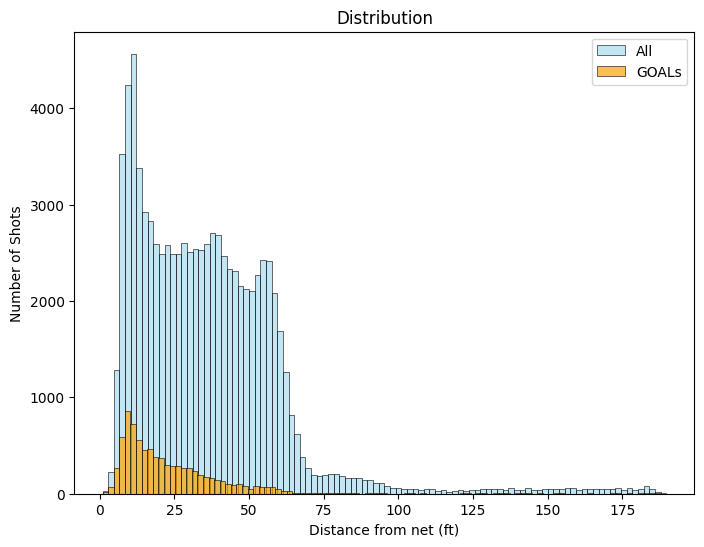

In [28]:
"""Visualize the distribution of the distances to see that it all looks corrrect"""

temp_all=df_2018["distance_from_net"]
temp_goal=df_2018.loc[df_2018["event_type"] == "GOAL", "distance_from_net"]

plt.figure(figsize=(8,6))

sns.histplot(temp_all, color="skyblue", label="All", kde=False, bins=100, alpha=0.5)
sns.histplot(temp_goal, color="orange", label="GOALs", kde=False, bins=100, alpha=0.7)

plt.title("Distribution")
plt.xlabel("Distance from net (ft)")
plt.ylabel("Number of Shots")
plt.legend()
plt.show()

In [29]:
'''Write a function to caclulate the metrics needed for the figure'''
bin_size = 10

def calculate_metrics(df):

    df['distance_bin'] = (df['distance_from_net'].dropna() // bin_size * bin_size).astype(int)

    shots_per_bin = df.groupby('distance_bin').size()

    goals_per_bin = df.loc[df['event_type'] == "GOAL"].groupby('distance_bin').size()

    shots_per_sum = (shots_per_bin / shots_per_bin.sum()*100).round(2)
    
    # 4. Compute goal rate (goals / shots)
    rate_per_bin = ((goals_per_bin / shots_per_bin).fillna(0)*100).round(2)

    return shots_per_bin, rate_per_bin, shots_per_sum

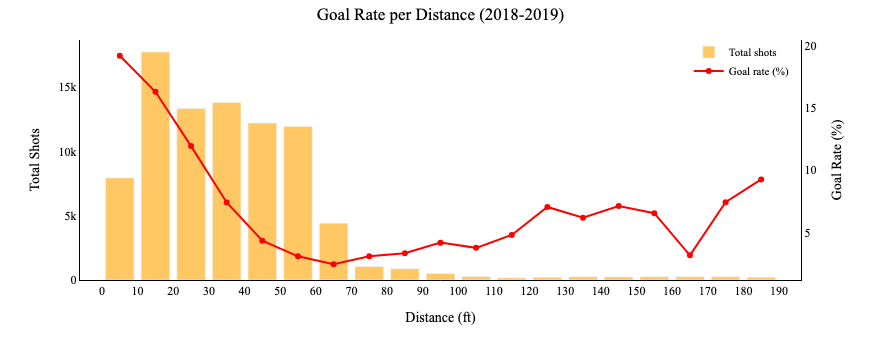

In [30]:
'''test for one season'''

shots_per_bin, rate_per_bin, shots_per_sum=calculate_metrics(df_2018)

fig = go.Figure()


fig.add_trace(go.Bar(
    x=(shots_per_bin.index.astype(int) + bin_size/2),  # bin midpoints
    y=shots_per_bin.values,
    name="Total shots",
    marker_color="orange",
    opacity=0.6,
    yaxis="y1"
))

fig.add_trace(go.Scatter(
    x=(rate_per_bin.index.astype(int) + bin_size/2),
    y=rate_per_bin.values,
    name="Goal rate (%)",
    mode="markers+lines",
    marker=dict(color="red"),
    yaxis="y2"
))


family_titles="Times New Roman"
fig.update_layout(
    plot_bgcolor="white",
    paper_bgcolor="white",
    title=dict(
    text="Goal Rate per Distance (2018-2019)",
    font=dict(size=17, family=family_titles, color="black"),  # title font
    x=0.5,
    pad=dict(t=1)

    ),
    xaxis=dict(
        title=dict(
            text="Distance (ft)",
            font=dict(size=14, family=family_titles, color="black")
        ),
        tickfont=dict(size=12, family=family_titles, color="black"),
        showgrid=False,
        zeroline=False,      
        showline=True,       
        linecolor="black",   
        linewidth=1        
    ),
    yaxis=dict(
        title=dict(
            text="Total Shots",
            font=dict(size=14, family=family_titles, color="black")
        ),
        tickfont=dict(size=12, family=family_titles, color="black"),
        showgrid=False,
        zeroline=False,      
        showline=True,       
        linecolor="black",   
        linewidth=1        
    ),
    yaxis2=dict(
        title=dict(
            text="Goal Rate (%)",
            font=dict(size=14, family=family_titles, color="black")
        ),
        tick0=0,
        dtick=5,  
        tickfont=dict(size=12, family=family_titles, color="black"),
        overlaying="y",
        side="right",
        showgrid=False,
        zeroline=False,      
        showline=True,       
        linecolor="black",   
        linewidth=1        
    ),
    legend=dict(
        x=0.99, y=1.01,              
        xanchor="right", yanchor="top",
        font=dict(size=11, family=family_titles, color="black"),
        bgcolor="rgba(255,255,255,0.5)"  # optional background
    ),
    barmode="group",
    margin=dict(t=40)
    )

fig.update_xaxes(
    tick0=0,   # where ticks start
    dtick=10,  # step size
    tickmode="linear"
)

#fig.add_annotation(
#    text=caption,
#    xref="paper", yref="paper",
#    x=1.1, y=-0.4,
#    showarrow=False,
#    font=dict(size=12, family=family_titles, color="black"),
#    align="left"
#)

#fig.write_image("shot_types.svg")   # SVG
#fig.write_image("distance2018.png", scale=5)
fig.show()

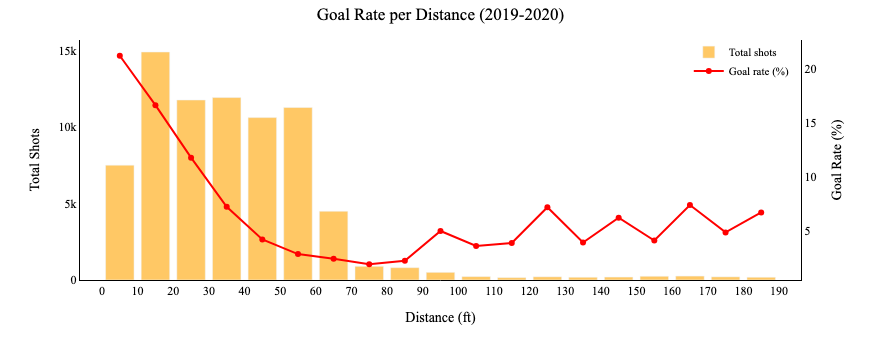

In [31]:
shots, rate, rate_of_shots = calculate_metrics(df_2019)

fig = go.Figure()

fig.add_trace(go.Bar(
    x=(shots.index.astype(int) + bin_size/2),  # bin midpoints
    y=shots.values,
    name="Total shots",
    marker_color="orange",
    opacity=0.6,
    yaxis="y1"
))

fig.add_trace(go.Scatter(
    x=(rate.index.astype(int) + bin_size/2),
    y=rate.values,
    name="Goal rate (%)",
    mode="markers+lines",
    marker=dict(color="red"),
    yaxis="y2"
))


family_titles="Times New Roman"
fig.update_layout(
    plot_bgcolor="white",
    paper_bgcolor="white",
    title=dict(
    text="Goal Rate per Distance (2019-2020)",
    font=dict(size=17, family=family_titles, color="black"),  # title font
    x=0.5,
    pad=dict(t=1)

    ),
    xaxis=dict(
        title=dict(
            text="Distance (ft)",
            font=dict(size=14, family=family_titles, color="black")
        ),
        tickfont=dict(size=12, family=family_titles, color="black"),
        showgrid=False,
        zeroline=False,      
        showline=True,       
        linecolor="black",   
        linewidth=1        
    ),
    yaxis=dict(
        title=dict(
            text="Total Shots",
            font=dict(size=14, family=family_titles, color="black")
        ),
        tickfont=dict(size=12, family=family_titles, color="black"),
        showgrid=False,
        zeroline=False,      
        showline=True,       
        linecolor="black",   
        linewidth=1        
    ),
    yaxis2=dict(
        title=dict(
            text="Goal Rate (%)",
            font=dict(size=14, family=family_titles, color="black")
        ),
        tickfont=dict(size=12, family=family_titles, color="black"),
        overlaying="y",
        side="right",
        showgrid=False,
        zeroline=False,      
        showline=True,       
        linecolor="black",   
        linewidth=1        
    ),
    legend=dict(
        x=0.99, y=1.01,              
        xanchor="right", yanchor="top",
        font=dict(size=11, family=family_titles, color="black"),
        bgcolor="rgba(255,255,255,0.5)"  # optional background
    ),
    barmode="group",
    margin=dict(t=40)
    )

fig.update_xaxes(
    tick0=0,   # where ticks start
    dtick=10,  # step size
    tickmode="linear"
)

#fig.add_annotation(
#    text=caption,
#    xref="paper", yref="paper",
#    x=1.1, y=-0.4,
#    showarrow=False,
#    font=dict(size=12, family=family_titles, color="black"),
#    align="left"
#)


#fig.write_image("distance2019.png", scale=5)
fig.show()

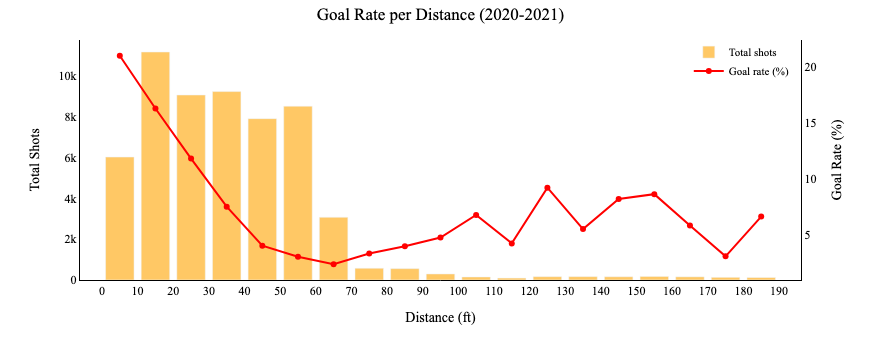

In [32]:
shots, rate, rate_of_shots = calculate_metrics(df_2020)

fig = go.Figure()

fig.add_trace(go.Bar(
    x=(shots.index.astype(int) + bin_size/2),  # bin midpoints
    y=shots.values,
    name="Total shots",
    marker_color="orange",
    opacity=0.6,
    yaxis="y1"
))

fig.add_trace(go.Scatter(
    x=(rate.index.astype(int) + bin_size/2),
    y=rate.values,
    name="Goal rate (%)",
    mode="markers+lines",
    marker=dict(color="red"),
    yaxis="y2"
))


family_titles="Times New Roman"
fig.update_layout(
    plot_bgcolor="white",
    paper_bgcolor="white",
    title=dict(
    text="Goal Rate per Distance (2020-2021)",
    font=dict(size=17, family=family_titles, color="black"),  # title font
    x=0.5,
    pad=dict(t=1)

    ),
    xaxis=dict(
        title=dict(
            text="Distance (ft)",
            font=dict(size=14, family=family_titles, color="black")
        ),
        tickfont=dict(size=12, family=family_titles, color="black"),
        showgrid=False,
        zeroline=False,      
        showline=True,       
        linecolor="black",   
        linewidth=1        
    ),
    yaxis=dict(
        title=dict(
            text="Total Shots",
            font=dict(size=14, family=family_titles, color="black")
        ),
        tickfont=dict(size=12, family=family_titles, color="black"),
        showgrid=False,
        zeroline=False,      
        showline=True,       
        linecolor="black",   
        linewidth=1        
    ),
    yaxis2=dict(
        title=dict(
            text="Goal Rate (%)",
            font=dict(size=14, family=family_titles, color="black")
        ),
        tickfont=dict(size=12, family=family_titles, color="black"),
        overlaying="y",
        side="right",
        showgrid=False,
        zeroline=False,      
        showline=True,       
        linecolor="black",   
        linewidth=1        
    ),
    legend=dict(
        x=0.99, y=1.01,              
        xanchor="right", yanchor="top",
        font=dict(size=11, family=family_titles, color="black"),
        bgcolor="rgba(255,255,255,0.5)"  # optional background
    ),
    barmode="group",
    margin=dict(t=40)
    )

fig.update_xaxes(
    tick0=0,   # where ticks start
    dtick=10,  # step size
    tickmode="linear"
)

#fig.add_annotation(
#    text=caption,
#    xref="paper", yref="paper",
#    x=1.1, y=-0.4,
#    showarrow=False,
#    font=dict(size=12, family=family_titles, color="black"),
#    align="left"
#)

#fig.write_image("shot_types.svg")   # SVG
#fig.write_image("distance2020.png", scale=5)
fig.show()

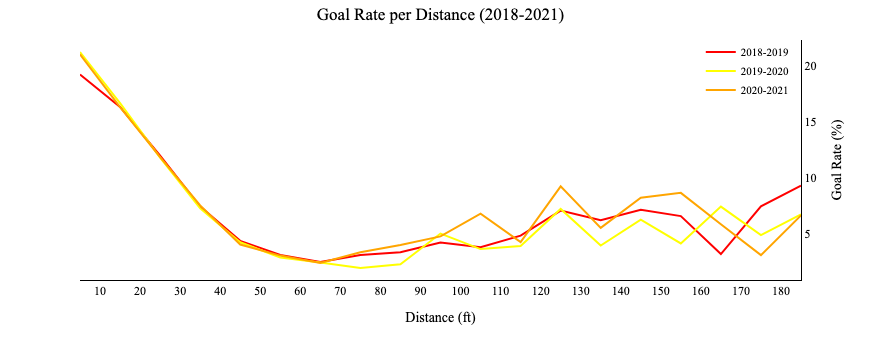

In [33]:
''' Create a single figure for all seasons'''

shots1, rate1, rate_of_shots1 = calculate_metrics(df_2018)
shots2, rate2, rate_of_shots2 = calculate_metrics(df_2019)
shots3, rate3, rate_of_shots3 = calculate_metrics(df_2020)


fig = go.Figure()

fig.add_trace(go.Scatter(
    x=(rate1.index.astype(int) + bin_size/2),
    y=rate1.values,
    name="2018-2019",
    mode="lines",
    marker=dict(color="red"),
    yaxis="y2"
))

fig.add_trace(go.Scatter(
    x=(rate2.index.astype(int) + bin_size/2),
    y=rate2.values,
    name="2019-2020",
    mode="lines",
    marker=dict(color="yellow"),
    yaxis="y2"
))

fig.add_trace(go.Scatter(
    x=(rate3.index.astype(int) + bin_size/2),
    y=rate3.values,
    name="2020-2021",
    mode="lines",
    marker=dict(color="orange"),
    yaxis="y2"
))



family_titles="Times New Roman"
fig.update_layout(
    plot_bgcolor="white",
    paper_bgcolor="white",
    title=dict(
    text="Goal Rate per Distance (2018-2021)",
    font=dict(size=17, family=family_titles, color="black"),  # title font
    x=0.5,
    pad=dict(t=1)

    ),
    xaxis=dict(
        title=dict(
            text="Distance (ft)",
            font=dict(size=14, family=family_titles, color="black")
        ),
        tickfont=dict(size=12, family=family_titles, color="black"),
        showgrid=False,
        zeroline=False,      
        showline=True,       
        linecolor="black",   
        linewidth=1        
    ),
    yaxis=dict(
        title=dict(
            text="Total Shots",
            font=dict(size=14, family=family_titles, color="black")
        ),
        tickfont=dict(size=12, family=family_titles, color="black"),
        showgrid=False,
        zeroline=False,      
        showline=True,       
        linecolor="black",   
        linewidth=1        
    ),
    yaxis2=dict(
        title=dict(
            text="Goal Rate (%)",
            font=dict(size=14, family=family_titles, color="black")
        ),
        tickfont=dict(size=12, family=family_titles, color="black"),
        overlaying="y",
        side="right",
        showgrid=False,
        zeroline=False,      
        showline=True,       
        linecolor="black",   
        linewidth=1        
    ),
    legend=dict(
        x=0.99, y=1.01,              
        xanchor="right", yanchor="top",
        font=dict(size=11, family=family_titles, color="black"),
        bgcolor="rgba(255,255,255,0.5)"  # optional background
    ),
    barmode="group",
    margin=dict(t=40)
    )

fig.update_xaxes(
    tick0=0,   # where ticks start
    dtick=10,  # step size
    tickmode="linear"
)

#fig.write_image("distance_all.png", scale=5)
fig.show()


### Second Figure_choice

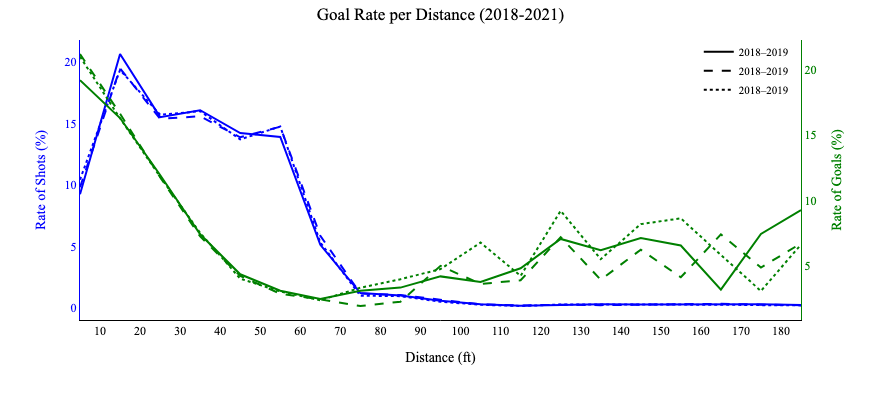

In [37]:
''' Create a single figure for all seasons'''
'''Display shots rate instead of total goals to improve lisibility'''

shots1, rate1, rate_of_shots1 = calculate_metrics(df_2018)
shots2, rate2, rate_of_shots2 = calculate_metrics(df_2019)
shots3, rate3, rate_of_shots3 = calculate_metrics(df_2020)


fig = go.Figure()

fig.add_trace(go.Scatter(
    x=(rate1.index.astype(int) + bin_size/2),
    y=rate1.values,
    name="2018-2019",
    mode="lines",
    marker=dict(color="red"),
    line=dict(color="green", dash="solid", width=2),
    yaxis="y2",
    showlegend=False

))

fig.add_trace(go.Scatter(
    x=(rate2.index.astype(int) + bin_size/2),
    y=rate2.values,
    name="2019-2020",
    mode="lines",
    marker=dict(color="yellow"),
    line=dict(color="green", dash="dash", width=2),
    yaxis="y2",
    showlegend=False

))

fig.add_trace(go.Scatter(
    x=(rate3.index.astype(int) + bin_size/2),
    y=rate3.values,
    name="2020-2021",
    mode="lines",
    marker=dict(color="orange"),
    line=dict(color="green", dash="dot", width=2),
    yaxis="y2",
    showlegend=False

))

fig.add_trace(go.Scatter(
    x=(rate1.index.astype(int) + bin_size/2),
    y=rate_of_shots1.values,
    name="2018-2019",
    mode="lines",
    marker=dict(color="red"),
    line=dict(color="blue", dash="solid", width=2),
    yaxis="y1",
    showlegend=False
))

fig.add_trace(go.Scatter(
    x=(rate2.index.astype(int) + bin_size/2),
    y=rate_of_shots2.values,
    name="2019-2020",
    mode="lines",
    marker=dict(color="yellow"),
    line=dict(color="blue", dash="dash", width=2),
    yaxis="y1",
    showlegend=False
))

fig.add_trace(go.Scatter(
    x=(rate3.index.astype(int) + bin_size/2),
    y=rate_of_shots3.values,
    name="2020-2021",
    mode="lines",
    marker=dict(color="orange"),
    line=dict(color="blue", dash="dot", width=2),
    yaxis="y1",
    showlegend=False
))

'''Here we add one dummy set of lines only to be displayed as the legend'''
fig.add_trace(go.Scatter(
    x=[None], y=[None],         
    mode="lines",
    line=dict(color="black", dash="solid", width=2),
    name="2018–2019",             
    hoverinfo="skip"             
))
fig.add_trace(go.Scatter(
    x=[None], y=[None],          
    mode="lines",
    line=dict(color="black", dash="dash", width=2),
    name="2018–2019",             
    hoverinfo="skip"              
))
fig.add_trace(go.Scatter(
    x=[None], y=[None],           
    mode="lines",
    line=dict(color="black", dash="dot", width=2),
    name="2018–2019",             
    hoverinfo="skip"              
))

#fig.add_trace(go.Scatter(
#    x=[None], y=[None],           
#    mode="markers",
#    line=dict(color="blue", width=2),
#    name="Shots Ratio",             
#    hoverinfo="skip"              
#))

#fig.add_trace(go.Scatter(
#    x=[None], y=[None],           
#    mode="markers",
#    line=dict(color="green", width=2),
#    name="Goals Ratio",             
#    hoverinfo="skip"              
#))


family_titles="Times New Roman"
fig.update_layout(
    plot_bgcolor="white",
    paper_bgcolor="white",
    title=dict(
    text="Goal Rate per Distance (2018-2021)",
    font=dict(size=17, family=family_titles, color="black"),  # title font
    x=0.5,
    pad=dict(t=1)

    ),
    xaxis=dict(
        title=dict(
            text="Distance (ft)",
            font=dict(size=14, family=family_titles, color="black")
        ),
        tickfont=dict(size=12, family=family_titles, color="black"),
        showgrid=False,
        zeroline=False,      
        showline=True,       
        linecolor="black",   
        linewidth=1        
    ),
    yaxis=dict(
        title=dict(
            text="Rate of Shots (%)",
            font=dict(size=14, family=family_titles, color="blue")
        ),
        tickfont=dict(size=12, family=family_titles, color="blue"),
        showgrid=False,
        zeroline=False,      
        showline=True,       
        linecolor="blue",   
        linewidth=1        
    ),
    yaxis2=dict(
        title=dict(
            text="Rate of Goals (%)",
            font=dict(size=14, family=family_titles, color="green")
        ),
        tickfont=dict(size=12, family=family_titles, color="green"),
        overlaying="y",
        side="right",
        showgrid=False,
        zeroline=False,      
        showline=True,       
        linecolor="green",   
        linewidth=1        
    ),
    legend=dict(
        x=0.99, y=1.01,              
        xanchor="right", yanchor="top",
        font=dict(size=11, family=family_titles, color="black"),
        bgcolor="rgba(255,255,255,0.5)"
    ),
    barmode="group",
    margin=dict(t=40)
    )

fig.update_xaxes(
    tick0=0,   # where ticks start
    dtick=10,  # step size
    tickmode="linear"
)
fig.update_layout(width=800, height=400)
fig.write_image(OUT_PATH_VIS+"Goal_Rate_per_Distance_All_Seasons_New.png", scale=5)
fig.write_image(OUT_PATH_VIS+"Goal_Rate_per_Distance_All_Seasons_New.png.svg")
fig.write_html(OUT_PATH_VIS + "Goal_Rate_per_Distance_All_Seasons_New.html", include_plotlyjs="cdn", full_html=False)
fig.show()

In [36]:
caption = ("Figure 5.2 compares goal rate by distance from the net (right) with the share of shots by distance (left). "
           "Distances are grouped into 5-ft bins (e.g., 0–5, 5–10). "
           "We observe a stable pattern for shots and goal distribution across seasons. "
           "Goal probabilities are higher for shots  taken closer to the net, though shots within 6 ft are rare. "
           "The most effective zone is 6–18 ft, where both shot volume and goal rate are high.")
print(caption)

Figure 5.2 compares goal rate by distance from the net (right) with the share of shots by distance (left). Distances are grouped into 5-ft bins (e.g., 0–5, 5–10). We observe a stable pattern for shots and goal distribution across seasons. Goal probabilities are higher for shots  taken closer to the net, though shots within 6 ft are rare. The most effective zone is 6–18 ft, where both shot volume and goal rate are high.


## Third Figure

Instruction : Combine the information from the previous sections to produce a figure that
shows the goal percentage (# goals / # shots) as a function of both distance
from the net, and the category of shot types (you can pick a single season of
your choice). Briefly discuss your findings; e.g. what might be the most
dangerous types of shots?

### Third Figure_prep

In [38]:
'''We work with the same season as before (2021-2022)'''

path="ift6758/data/2016-2024_processed/2021-2022_events.csv"
df_2021=pd.read_csv(path)
df_2021.head(5)

,game_id,season,game_type,event_type,period,period_time,x_coord,y_coord,shot_type,team_id,team_name,player_name,goalie_name
0,2021020001,2021,regular,SHOT_ON_GOAL,1,01:03,61,-32,wrist,14,Tampa Bay Lightning,Steven Stamkos,Tristan Jarry
1,2021020001,2021,regular,SHOT_ON_GOAL,1,01:44,-65,19,wrist,5,Pittsburgh Penguins,Brock McGinn,Andrei Vasilevskiy
2,2021020001,2021,regular,SHOT_ON_GOAL,1,02:01,-8,-27,wrist,14,Tampa Bay Lightning,Jan Rutta,Tristan Jarry
3,2021020001,2021,regular,SHOT_ON_GOAL,1,02:47,-60,-4,wrist,5,Pittsburgh Penguins,Danton Heinen,Andrei Vasilevskiy
4,2021020001,2021,regular,SHOT_ON_GOAL,1,03:07,63,4,wrist,14,Tampa Bay Lightning,Ondrej Palat,Tristan Jarry


In [39]:
df_2021=calculate_distance(df_2021)

In [40]:
bin_size=5
df_2021['distance_bin'] = (df_2021['distance_from_net'].dropna() // bin_size * bin_size).astype(int)

In [41]:
grouped = (df_2021
           .groupby(['shot_type', 'distance_bin'])
           .size()
           .rename('shots')
           .reset_index()
           .sort_values(['shot_type', 'distance_bin']))

# optional: human-friendly bin labels like "0-10"
grouped['bin_label'] = grouped['distance_bin'].map(lambda s: f"{int(s)}-{int(s + bin_size)}")

'''Visualize the metrics to be sure it is correct'''
print(grouped[['shot_type', 'bin_label', 'shots']].to_string(index=False))

  shot_type bin_label  shots
   backhand       0-5     68
   backhand      5-10   2061
   backhand     10-15   2082
   backhand     15-20   1020
   backhand     20-25    582
   backhand     25-30    360
   backhand     30-35    200
   backhand     35-40    161
   backhand     40-45     91
   backhand     45-50     75
   backhand     50-55     55
   backhand     55-60     41
   backhand     60-65     29
   backhand     65-70     40
   backhand     70-75     33
   backhand     75-80     35
   backhand     80-85     36
   backhand     85-90     35
   backhand     90-95     24
   backhand    95-100     22
   backhand   100-105     13
   backhand   105-110      2
   backhand   110-115      3
   backhand   115-120      5
   backhand   120-125      6
   backhand   125-130      4
   backhand   130-135      4
   backhand   135-140      3
   backhand   140-145      4
   backhand   145-150     10
   backhand   150-155     13
   backhand   155-160      7
   backhand   160-165      3
   backhand   

### Third Figure_tests

In [42]:
max_bin_for_plot = 70

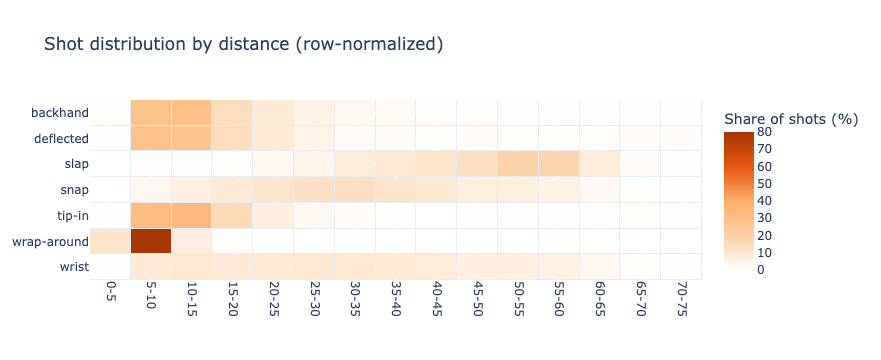

In [43]:
matrix_to_plot = grouped.pivot(index="shot_type", columns="distance_bin", values="shots").fillna(0)
row_pct = matrix_to_plot.div(matrix_to_plot.sum(axis=1).replace(0, np.nan), axis=0) * 100

# build ordered x labels from numeric bins
bins = row_pct.columns.to_numpy()

max_bin_for_plot=70

bins = bins[bins <= max_bin_for_plot]
row_pct = row_pct.loc[:, bins]

x_labels = [f"{int(b)}-{int(b + bin_size)}" for b in bins]

# heatmap
fig = go.Figure(go.Heatmap(
    x=x_labels,
    y=row_pct.index,
    z=row_pct.values,
    colorscale="Blues",
    zmin=0, zmax=100,
    colorbar=dict(title="Share of shots (%)"),
    xgap=1, ygap=1
))
fig.update_layout(
    title="Shot distribution by distance (row-normalized)",
    xaxis=dict(categoryorder='array', categoryarray=x_labels)
)

fig.update_traces(
    colorscale="Oranges",   # darker, colorblind-friendly
    zmin=0, zmax=80,        # limit range
    colorbar=dict(title="Share of shots (%)", tick0=0, dtick=10),
    selector=dict(type="heatmap")
)
fig.update_yaxes(autorange="reversed")
fig.update_xaxes(tickangle=90)

fig.update_traces(
    zmin=0, zmax=80, zauto=False,
    colorscale=[
        [0.00, "rgb(255,255,255)"],   # 0  -> near-white
        [0.125, "rgb(254,230,206)"],  # ~10 -> visible light orange
        [0.25, "rgb(253,208,162)"],
        [0.50, "rgb(253,174,107)"],
        [0.75, "rgb(230,85,13)"],
        [1.00, "rgb(166,54,3)"]
    ],
    colorbar=dict(title="Share of shots (%)", tick0=0, dtick=10),
    selector=dict(type="heatmap")
)

fig.show()

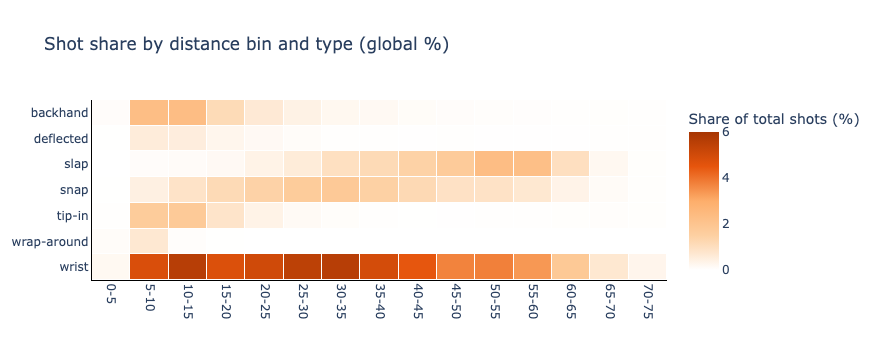

In [44]:
# Pivot -> limit bins -> GLOBAL shot share (% of ALL shots, not per row)
matrix = grouped.pivot(index="shot_type", columns="distance_bin", values="shots").fillna(0)
bins = np.sort(matrix.columns.to_numpy())

bins = bins[bins <= max_bin_for_plot]
matrix = matrix.loc[:, bins]

total_shots_all = grouped["shots"].sum()  # normalize by ALL shots (not per row)
share = (matrix / total_shots_all) * 100

x_labels = [f"{int(b)}-{int(b+bin_size)}" for b in share.columns]

fig = go.Figure(go.Heatmap(
    x=x_labels,
    y=share.index,
    z=share.values,
    zmin=0, zmax=6, zauto=False,  # adjust if needed
    colorscale=[
        [0.00, "rgb(255,255,255)"],
        [0.125, "rgb(254,230,206)"],
        [0.25, "rgb(253,208,162)"],
        [0.50, "rgb(253,174,107)"],
        [0.75, "rgb(230,85,13)"],
        [1.00, "rgb(166,54,3)"]
    ],
    colorbar=dict(title="Share of total shots (%)", tickmode="linear", tick0=0, dtick=2),
    xgap=1, ygap=1,
))

fig.update_layout(
    title="Shot share by distance bin and type (global %)",
    xaxis=dict(categoryorder='array', categoryarray=x_labels, tickangle=90, showline=True, linecolor="black"),
    yaxis=dict(autorange="reversed", showline=True, linecolor="black"),
    plot_bgcolor="white", paper_bgcolor="white"
)

fig.show()


In [45]:
grouped_goals = (
    df_2021.loc[df_2021["event_type"] == "GOAL"]
    .groupby(["shot_type", "distance_bin"])
    .size()
    .rename("goals")
    .reset_index()
    .sort_values(["shot_type", "distance_bin"])
)

# human-friendly bin labels like "0-10"
grouped_goals["bin_label"] = grouped_goals["distance_bin"].map(lambda s: f"{int(s)}-{int(s + bin_size)}")

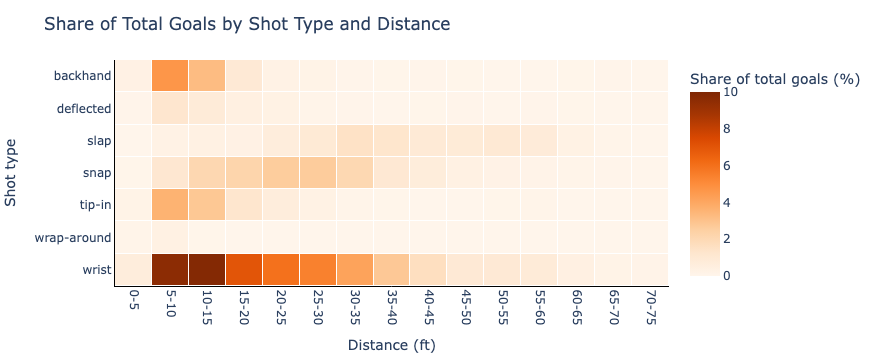

In [46]:
# --- share of goals per (shot_type, distance_bin) ---
total_goals = grouped_goals["goals"].sum()
grouped_goals["goal_share_pct"] = (
    grouped_goals["goals"].astype(float).div(total_goals).mul(100)
    if total_goals > 0 else 0.0
)


# Pivot to matrix (rows=shot types, cols=distance bins) and keep numeric bin order
Z = (grouped_goals
     .pivot(index="shot_type", columns="distance_bin", values="goal_share_pct")
     .fillna(0)
     .sort_index(axis=1))

bins = np.sort(matrix.columns.to_numpy())
bins = bins[bins <= max_bin_for_plot]
Z = Z.loc[:, bins]

# X labels from numeric bins (assumes bin_size is defined, e.g., 5 or 10)
x_labels = [f"{int(b)}-{int(b + bin_size)}" for b in Z.columns]



# Heatmap (share of total goals)
fig = go.Figure(go.Heatmap(
    x=x_labels,
    y=Z.index,
    z=Z.values,
    colorscale="Oranges",
    zmin=0, zmax=8, zauto=False,  # adjust zmax as needed
    colorbar=dict(title="Share of total goals (%)", tickmode="linear", tick0=0, dtick=1),
    xgap=1, ygap=1,
))

fig.update_layout(
    title="Share of Total Goals by Shot Type and Distance",
    plot_bgcolor="white", paper_bgcolor="white",
    xaxis=dict(title="Distance (ft)", tickangle=90, categoryorder="array", categoryarray=x_labels, showline=True, linecolor="black"),
    yaxis=dict(title="Shot type", autorange="reversed", showline=True, linecolor="black"),
    margin=dict(t=60, r=10, l=90, b=70)
)

fig.update_traces(zmin=0, zmax=10, zauto=False, colorbar=dict(tick0=0, dtick=2), selector=dict(type="heatmap"))

fig.show()

In [47]:
# merge and compute rate
rates = (grouped
         .merge(grouped_goals, on=['shot_type','distance_bin'], how='left')
         .fillna({'goals': 0}))

rates['goal_rate'] = (rates['goals'] / rates['shots']).replace([np.inf, np.nan], 0).round(3)

# rename labels
rates['bin_label'] = rates['distance_bin'].astype(int).map(lambda s: f"{int(s)}-{int(s + bin_size)}")

# sorted output
'''Visualize the metrics to be sure it is correct'''

print(rates[['shot_type', 'bin_label', 'shots', 'goals', 'goal_rate']].to_string(index=False))

  shot_type bin_label  shots  goals  goal_rate
   backhand       0-5     68   27.0      0.397
   backhand      5-10   2061  416.0      0.202
   backhand     10-15   2082  289.0      0.139
   backhand     15-20   1020   86.0      0.084
   backhand     20-25    582   23.0      0.040
   backhand     25-30    360   15.0      0.042
   backhand     30-35    200    5.0      0.025
   backhand     35-40    161    3.0      0.019
   backhand     40-45     91    5.0      0.055
   backhand     45-50     75    3.0      0.040
   backhand     50-55     55    1.0      0.018
   backhand     55-60     41    0.0      0.000
   backhand     60-65     29    3.0      0.103
   backhand     65-70     40    4.0      0.100
   backhand     70-75     33    1.0      0.030
   backhand     75-80     35    1.0      0.029
   backhand     80-85     36    3.0      0.083
   backhand     85-90     35    1.0      0.029
   backhand     90-95     24    0.0      0.000
   backhand    95-100     22    2.0      0.091
   backhand  

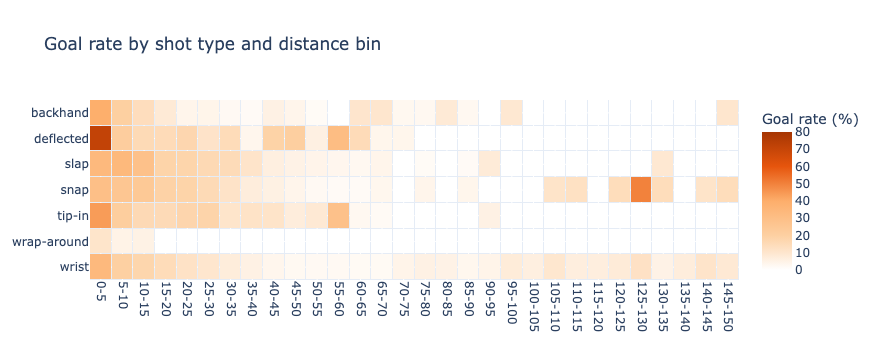

In [48]:
rate_matrix = rates.pivot(index="shot_type", columns="distance_bin", values="goal_rate").fillna(0)

'''Tranform values to percentages'''
rate_matrix *= 100

# --- limit x (bins) to <= 70 and build labels ---

max_bin_for_plot=145
bins = rate_matrix.columns.to_numpy()
bins = bins[bins <= max_bin_for_plot]
rate_matrix = rate_matrix.loc[:, bins]
x_labels = [f"{int(b)}-{int(b + bin_size)}" for b in bins]

# --- heatmap of GOAL RATE (%) ---
fig = go.Figure(go.Heatmap(
    x=x_labels,
    y=rate_matrix.index,
    z=rate_matrix.values,
    colorscale="Oranges",
    zmin=0, zmax=100,
    colorbar=dict(title="Goal rate (%)"),
    xgap=1, ygap=1
))

fig.update_layout(
    title="Goal rate by shot type and distance bin",
    xaxis=dict(categoryorder='array', categoryarray=x_labels),
)
fig.update_yaxes(autorange="reversed")
fig.update_xaxes(tickangle=90)

# darker orange scale with low values near-white, clamp 0–80 for visibility
fig.update_traces(
    zmin=0, zmax=80, zauto=False,
    colorscale=[
        [0.00, "rgb(255,255,255)"],   # 0  -> near-white
        [0.125, "rgb(254,230,206)"],  # ~10 -> visible light orange
        [0.25, "rgb(253,208,162)"],
        [0.50, "rgb(253,174,107)"],
        [0.75, "rgb(230,85,13)"],
        [1.00, "rgb(166,54,3)"]
    ],
    colorbar=dict(title="Goal rate (%)", tick0=0, dtick=10),
    selector=dict(type="heatmap")
)

fig.show()

### Third Figure_choice

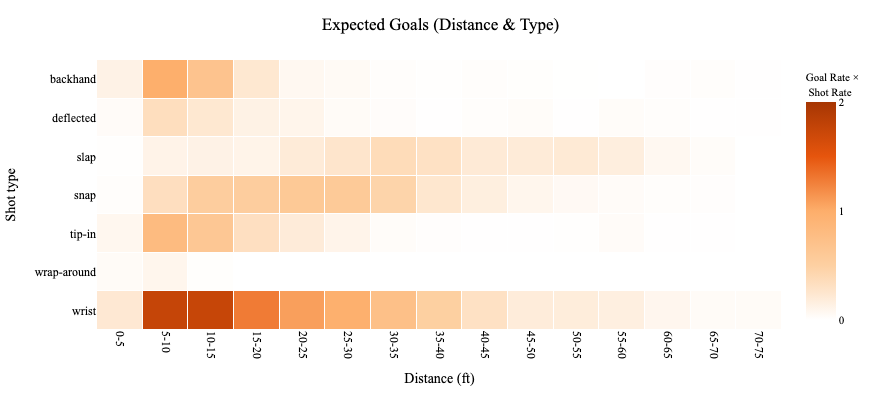

In [56]:
# Share of goals relative to total shots
'''Here we propose a metric that better visualizes the chances of a shot occuring (per type) at a certain distance
and its chances of being a goal. The formula is "scoreα =goal_rate×(shot_share)^α, where 0<α<1).'''

alpha = 0.8  # sqrt damping (0<alpha<1)
total_shots = rates["shots"].sum()
rates["shot_share"] = rates["shots"] / total_shots
rates['goal_rate'] = (rates['goals'] / rates['shots']).replace([np.inf, np.nan], 0).round(3)
rates["metric_damped"] = rates["goal_rate"] * (rates["shot_share"] ** alpha)  # use goal_rate as fraction, not %

# Visualize
Z = rates.pivot(index='shot_type', columns='distance_bin', values='metric_damped').fillna(0) * 100  # % of total goals

max_bin_for_plot=70

Z = Z.loc[:, [c for c in Z.columns if c <= max_bin_for_plot]]

# Labels
x_labels = [f"{int(b)}-{int(b+bin_size)}" for b in Z.columns]
family_titles="Times New Roman"

# --- heatmap ---
fig = go.Figure(go.Heatmap(
    x=x_labels,
    y=Z.index,
    z=Z.values,
    zmin=0, zmax=80, zauto=False,
    colorscale=[
        [0.00, "rgb(255,255,255)"],
        [0.125, "rgb(254,230,206)"],
        [0.25, "rgb(253,208,162)"],
        [0.50, "rgb(253,174,107)"],
        [0.75, "rgb(230,85,13)"],
        [1.00, "rgb(166,54,3)"]
    ],
    colorbar=dict(title=dict(text=f"Goal Rate × <br> Shot Rate", font=dict(family=family_titles, size=11, color="black")),
              tickfont=dict(family=family_titles, size=11, color="black")),

    xgap=1, ygap=1,
))


fig.update_layout(
    font=dict(family=family_titles),  # global family
    title=dict(
        text="Expected Goals (Distance & Type)",
        x=0.5,
        font=dict(size=17, family=family_titles, color="black")
    ),
    plot_bgcolor="white", paper_bgcolor="white",
    xaxis=dict(
        title=dict(text="Distance (ft)", font=dict(size=14, family=family_titles, color="black")),
        tickfont=dict(size=12, family=family_titles, color="black"),
        categoryorder='array', categoryarray=x_labels,
        tickangle=90, showline=False, linecolor="black"
    ),
    yaxis=dict(
        title=dict(text="Shot type", font=dict(size=14, family=family_titles, color="black")),
        tickfont=dict(size=12, family=family_titles, color="black"),
        autorange="reversed", showline=False, linecolor="black"
    ),
    legend=dict(
        font=dict(size=8, family=family_titles, color="black")
    ),
    margin=dict(t=60, r=10, l=90, b=70)
)
fig.update_layout(width=800, height=400)
fig.update_traces(zmin=0, zmax=2, zauto=False, colorbar=dict(tick0=0, dtick=1), selector=dict(type="heatmap"))

fig.write_image(OUT_PATH_VIS+"b.Heatmap_2020_2021.png", scale=5)
fig.write_image(OUT_PATH_VIS+"b.Heatmap_2020_2021.svg")
fig.write_html(OUT_PATH_VIS + "b.Heatmap_2020_2021.html", include_plotlyjs="cdn", full_html=False)
fig.show()

In [27]:
caption = ('''Figure 5.3 presents the most "dangerous" shot types by distance.  
Darker zones indicate higher danger, combining both a larger number of shots from that zone and a higher goal rate.  
The z-metric was calculated as: z = goal_rate × (shot_share)^α, where 0 < α < 1.  
The exponent α was introduced to account for the unbalanced distribution of shot types (see Figure 5.1, e.g. "wrist" shots).  

We observe that the most dangerous shots are "wrist" shots taken from within 5–25 ft.  
"Tip-in", "Snap", and "Backhand" are also dangerous, though from different distance zones for each type.  
At longer distances, "Slap", "Snap" and "Wrist" shots are the only effective.  
The least common and effective shot type is the "Wrap-around".''')

print(caption)

Figure 5.3 presents the most "dangerous" shot types by distance.  
Darker zones indicate higher danger, combining both a larger number of shots from that zone and a higher goal rate.  
The z-metric was calculated as: z = goal_rate × (shot_share)^α, where 0 < α < 1.  
The exponent α was introduced to account for the unbalanced distribution of shot types (see Figure 5.1, e.g. "wrist" shots).  

We observe that the most dangerous shots are "wrist" shots taken from within 5–25 ft.  
"Tip-in", "Snap", and "Backhand" are also dangerous, though from different distance zones for each type.  
At longer distances, "Slap", "Snap" and "Wrist" shots are the only effective.  
The least common and effective shot type is the "Wrap-around".


### Alternative options for Third Figure

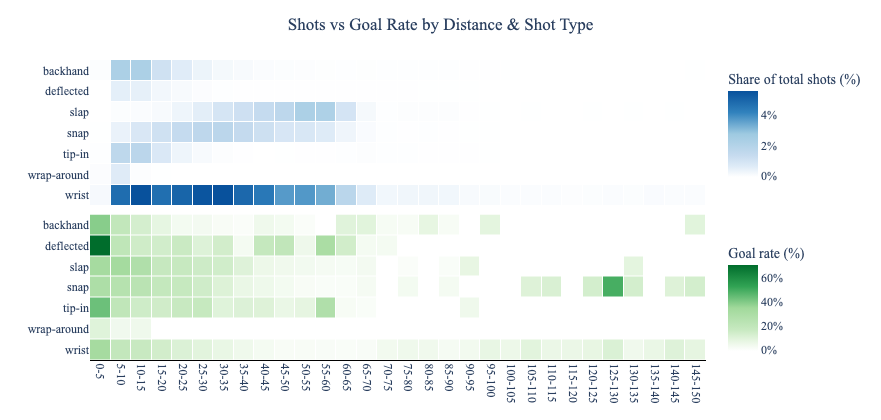

In [57]:
from plotly.subplots import make_subplots

# --- matrices (as in your snippet) ---
matrix_shots = grouped.pivot(index="shot_type", columns="distance_bin", values="shots").fillna(0)
total_shots_all = grouped["shots"].sum()
share_pct = (matrix_shots / total_shots_all) * 100

rates = (
    grouped.merge(grouped_goals, on=["shot_type", "distance_bin"], how="left")
           .fillna({"goals": 0})
)
rates["goal_rate_pct"] = (rates["goals"] / rates["shots"]).replace([np.inf, np.nan], 0) * 100
rate_matrix = rates.pivot(index="shot_type", columns="distance_bin", values="goal_rate_pct").fillna(0)

max_bin_for_plot = 145
bins = np.intersect1d(share_pct.columns.to_numpy(), rate_matrix.columns.to_numpy())
bins = bins[bins <= max_bin_for_plot]
share_pct = share_pct.loc[:, bins]
rate_matrix = rate_matrix.loc[:, bins]

# labels
bin_size = np.diff(bins).mean() if len(bins) > 1 else 5
x_labels = [f"{int(b)}-{int(b + bin_size)}" for b in bins]

# dynamic maxima per subplot
zmax_share = float(np.nanmax(share_pct.values)) if share_pct.size else 0
zmax_rate  = float(np.nanmax(rate_matrix.values)) if rate_matrix.size else 0

# --- figure: single title, tiny spacing ---
fig = make_subplots(
    rows=2, cols=1, shared_xaxes=True,
    vertical_spacing=0.03  # very small distance
)

# Heatmap 1: Share of total shots (%)
fig.add_trace(
    go.Heatmap(
        x=x_labels,
        y=share_pct.index,
        z=share_pct.values,
        zmin=0, zmax=zmax_share, zauto=False,
        colorscale=[
            [0.00, "rgb(255,255,255)"],
            [0.125, "rgb(222,235,247)"],
            [0.25, "rgb(198,219,239)"],
            [0.50, "rgb(158,202,225)"],
            [0.75, "rgb(49,130,189)"],
            [1.00, "rgb(8,81,156)"]
        ],
        xgap=1, ygap=1,
        colorbar=dict(
            title="Share of total shots (%)",
            ticksuffix="%",
            tick0=0,
            len=0.42,      # fit to top subplot
            y=0.79         # position near top subplot
        )
    ),
    row=1, col=1
)

# Heatmap 2: Goal rate per distance (%)
fig.add_trace(
    go.Heatmap(
        x=x_labels,
        y=rate_matrix.index,
        z=rate_matrix.values,
        zmin=0, zmax=zmax_rate, zauto=False,
        colorscale=[
            [0.00, "rgb(255,255,255)"],
            [0.125, "rgb(229,245,224)"],
            [0.25, "rgb(199,233,192)"],
            [0.50, "rgb(161,217,155)"],
            [0.75, "rgb(49,163,84)"],
            [1.00, "rgb(0,109,44)"]
        ],
        xgap=1, ygap=1,
        colorbar=dict(
            title="Goal rate (%)",
            ticksuffix="%",
            tick0=0,
            len=0.42,      # fit to bottom subplot
            y=0.21         # position near bottom subplot
        )
    ),
    row=2, col=1
)

family_titles = "Times New Roman"
fig.update_layout(
    title=dict(text="Shots vs Goal Rate by Distance & Shot Type", x=0.5),
    font=dict(family=family_titles),
    plot_bgcolor="white",
    paper_bgcolor="white",
    margin=dict(t=60, r=10, l=90, b=60),
    showlegend=False,
    width=800, height=420
)

# axes styling
fig.update_xaxes(categoryorder='array', categoryarray=x_labels, tickangle=90, row=2, col=1, showline=True, linecolor="black")
fig.update_yaxes(autorange="reversed", row=1, col=1)
fig.update_yaxes(autorange="reversed", row=2, col=1)
fig.write_image(OUT_PATH_VIS+"a.Heatmap_2020_2021.png", scale=5)
fig.write_html(OUT_PATH_VIS + "a.Heatmap_2020_2021.html", include_plotlyjs="cdn", full_html=False)

fig.show()
